## simple RNN for IMDB classification

In [2]:
# load IMDB data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10_000 # number of words in language
maxlen = 500 # max num words per data point

print('loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

loading data...
25000 train sequences
25000 test sequences
pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
# build simple RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

import tensorflow as tf
with tf.device('/CPU:0'): # had issues with M1 and SimpleRNN layer
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2)

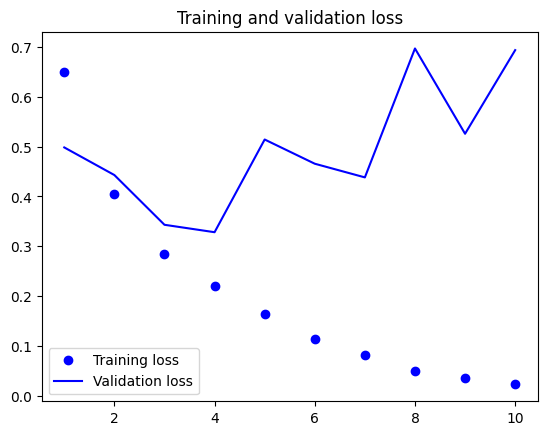

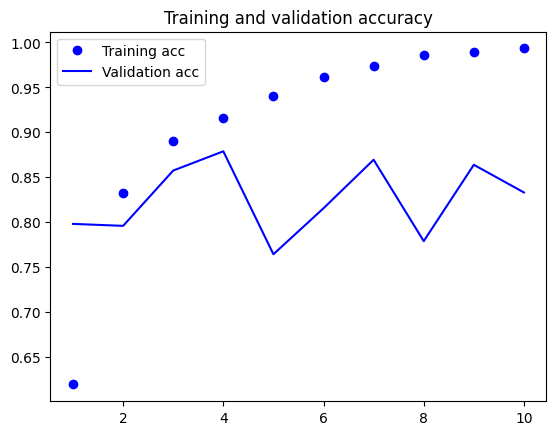

In [4]:
# plot training / validation loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

## LSTM for IMDB classification

In [ ]:
# build lstm model
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

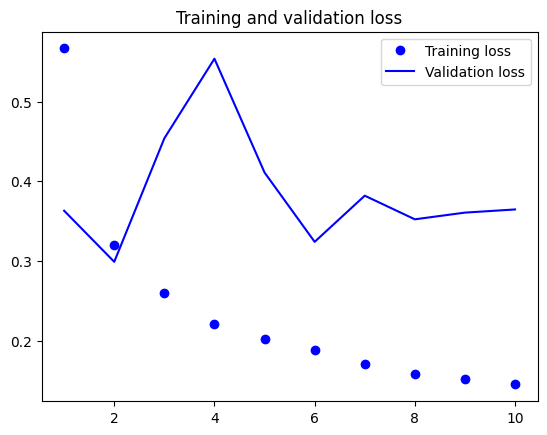

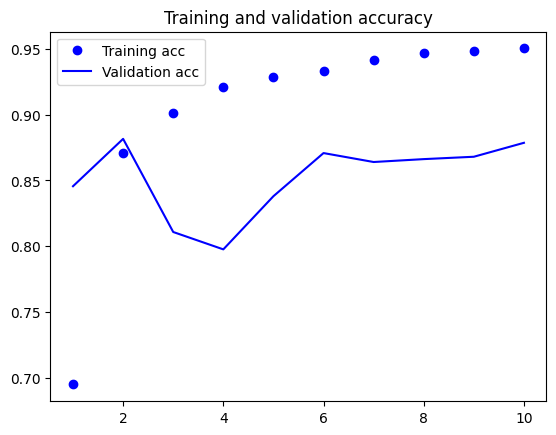

In [5]:
# plot training / validation loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [6]:
# evaluate model
model.evaluate(x_test, y_test)

782/782 [==============================] - 60s 75ms/step - loss: 2.9410 - acc: 0.5032


[2.940981864929199, 0.5032400488853455]

In [7]:
# evaluate new model after 3 epochs
model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)
model.evaluate(x_test, y_test)

Epoch 1/3
157/157 [==============================] - 33s 212ms/step - loss: 0.1366 - acc: 0.9546 - val_loss: 0.4290 - val_acc: 0.8694
Epoch 2/3
157/157 [==============================] - 33s 211ms/step - loss: 0.1317 - acc: 0.9554 - val_loss: 0.3685 - val_acc: 0.8614
Epoch 3/3
782/782 [==============================] - 63s 80ms/step - loss: 2.9092 - acc: 0.5032


[2.909158945083618, 0.5032400488853455]